In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [5]:
df.shape

(50000, 10)

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#values count of categorical variables
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts())

Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: cut, dtype: int64 
 G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: color, dtype: int64 
 SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: clarity, dtype: int64


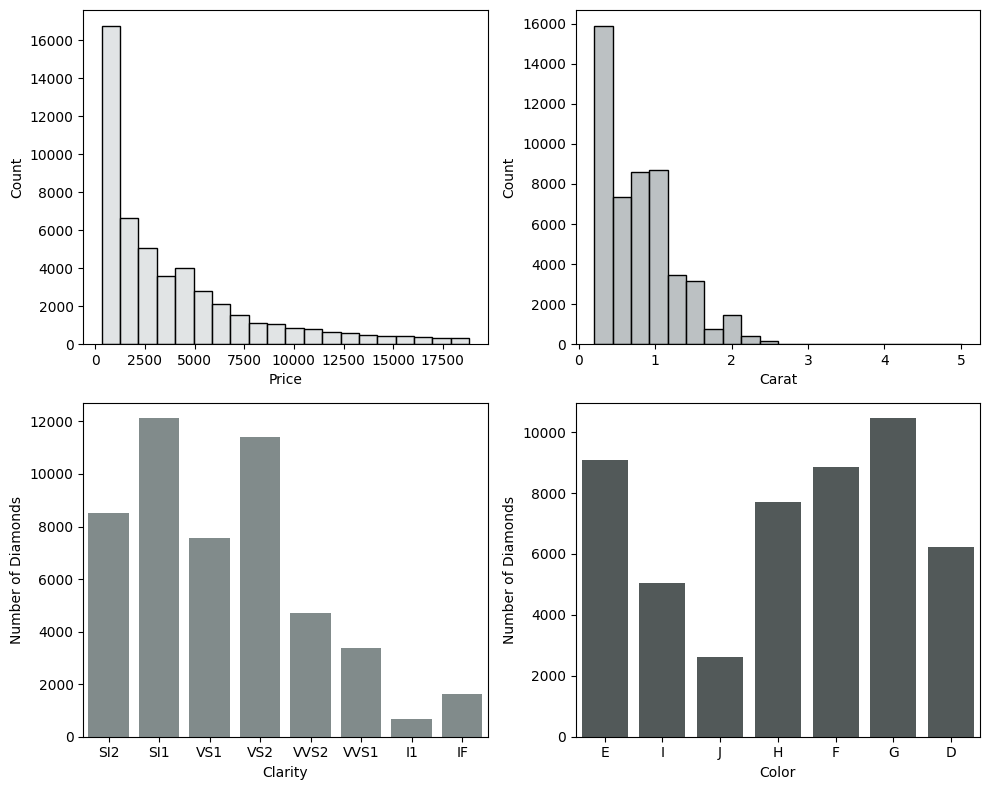

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms on the first subplot
sns.histplot(df['price'], bins=20, color="#D7DBDD", ax=ax1)
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Plot histograms on the second subplot
sns.histplot(df['carat'], bins=20, color="#A6ACAF", ax=ax2)
ax2.set_xlabel('Carat')
ax2.set_ylabel('Count')

# Plot bar chart on the third subplot
sns.countplot(x='clarity', data=df, color="#7F8C8D", ax=ax3)
ax3.set_xlabel('Clarity')
ax3.set_ylabel('Number of Diamonds')

# Plot bar chart on the fourth subplot
sns.countplot(x='color', data=df, color="#515A5A", ax=ax4)
ax4.set_xlabel('Color')
ax4.set_ylabel('Number of Diamonds')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

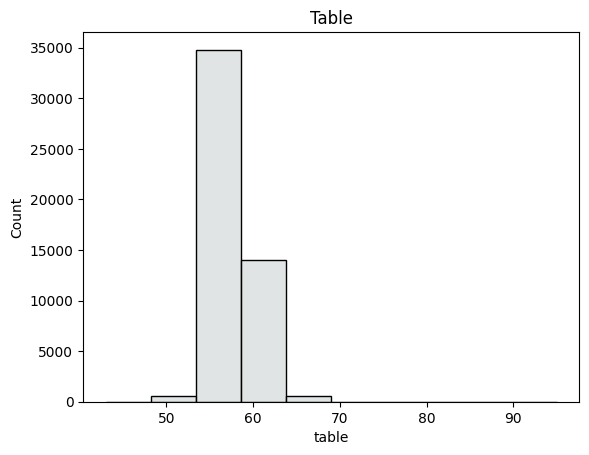

In [9]:
sns.histplot(df['table'],bins=10,color="#D7DBDD")
plt.title('Table')
plt.show()

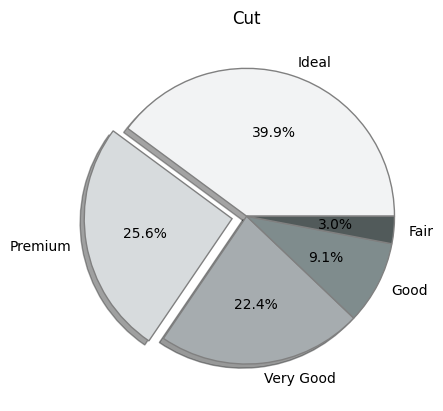

In [10]:
c=["#F2F3F4","#D7DBDD","#A6ACAF","#7F8C8D","#515A5A"]

ex=[0.0,0.1,0.0,0.0,0.0]
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%',explode=ex,colors=c,shadow=True,radius=1,labeldistance=1.1,startangle=0,
       textprops={"fontsize":10},counterclock=True,wedgeprops={"linewidth":1,"edgecolor":"grey"},rotatelabels=False)
plt.title('Cut')
plt.show()

In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
#changing categorical variables to numerical variables
df['cut'] = df['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df['color'] = df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df['clarity'] = df['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [13]:
#coorelation matrix
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.291530,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.019548,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
color,-0.291530,0.019548,1.000000,-0.026056,-0.047426,-0.027513,-0.172629,-0.270529,-0.263395,-0.268388
clarity,-0.352435,0.189024,-0.026056,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.047426,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.027513,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.172629,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.270529,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.263395,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.268388,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


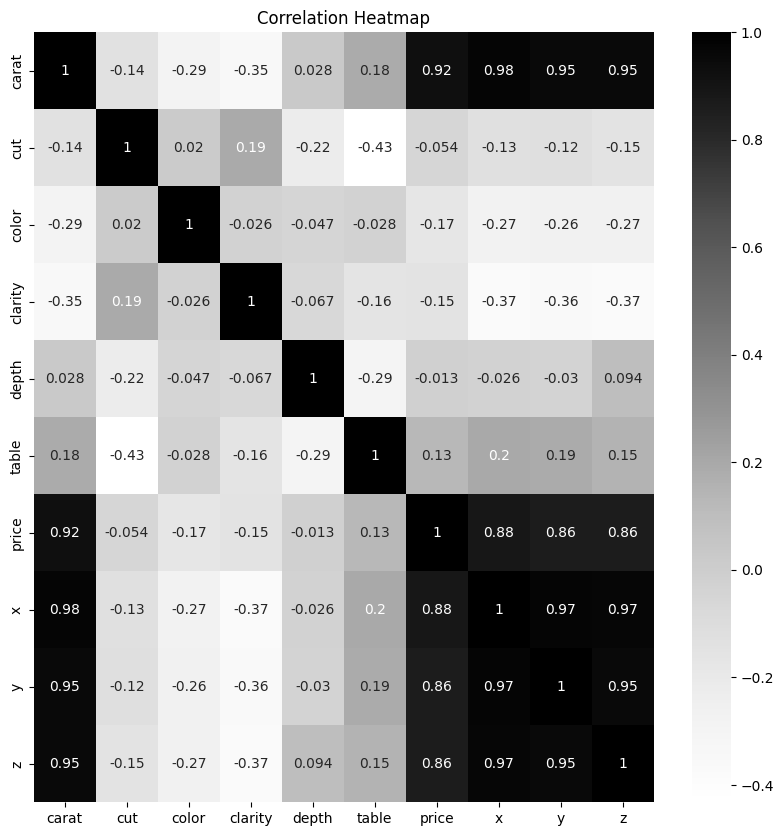

In [14]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')
plt.title('Correlation Heatmap')
plt.show()

# ***Model*** ***Building***

## ***Decision Tree***

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.2,random_state=42)

In [48]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [49]:
#training the model
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
#train accuracy
score=model.score(x_train,y_train)
print(score*100,'%')

99.99958796528536 %


In [51]:
# testing score
score = model.score(x_test,y_test)
print(score*100,'%')

96.47504491270742 %


In [52]:
#predicting the test set
model_pred = model.predict(x_test)

## ***Random Forest***

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [54]:
#training the model
rf.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
#train accuracy
score = rf.score(x_train,y_train)
print(score*100,'%')

99.73763527111271 %


In [56]:
# testing score
score = rf.score(x_test,y_test)
print(score*100,'%')

98.20071748406521 %


In [57]:
#predicting the test set
rf_pred = rf.predict(x_test)

## ***Linear Regression***

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
#training the model
lr.fit(x_train, y_train)

LinearRegression()

In [60]:
#train accuracy
score = lr.score(x_train,y_train)
print(score*100,'%')

90.66208612399896 %


In [61]:
# testing score
score = lr.score(x_test,y_test)
print(score*100,'%')

90.89238269387292 %


In [62]:
# Make predictions on the test set
lr_pred = model.predict(x_test)

## **Ensemble Learning**


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Initialize a Random Forest Regressor
rf = RandomForestRegressor()

# Define the number of epochs
num_epochs = 10

# Train the model for multiple epochs
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    rf.fit(x_train, y_train)

    # Train accuracy
    train_score = rf.score(x_train, y_train)
    print(f"Train Accuracy: {train_score * 100:.2f}%")

    # Test accuracy
    test_score = rf.score(x_test, y_test)
    print(f"Test Accuracy: {test_score * 100:.2f}%\n")

# Predict on the test set
rf_pred = rf.predict(x_test)


Epoch 1/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 2/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 3/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 4/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 5/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 6/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 7/10
Train Accuracy: 99.74%
Test Accuracy: 98.19%

Epoch 8/10
Train Accuracy: 99.74%
Test Accuracy: 98.20%

Epoch 9/10
Train Accuracy: 99.74%
Test Accuracy: 98.18%

Epoch 10/10
Train Accuracy: 99.74%
Test Accuracy: 98.19%



For increasing accuracy of the algorithm we are doing the regression by increasing trees, limiting maximum depth, by only Considering square root of features at each split.

In [32]:
rf = RandomForestRegressor(n_estimators=100)  # Increase the number of trees
rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
#train accuracy
score = rf.score(x_train,y_train)
print(score*100,'%')
# testing score
score = rf.score(x_test,y_test)
print(score*100,'%')

99.73657743971609 %
98.19979787836944 %


In [34]:
rf = RandomForestRegressor(max_depth=15)  # Limit the maximum depth of each tree
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15)

In [35]:
#train accuracy
score = rf.score(x_train,y_train)
print(score*100,'%')
# testing score
score = rf.score(x_test,y_test)
print(score*100,'%')

99.47790179763939 %
98.2214556298187 %


In [36]:
rf = RandomForestRegressor(min_samples_leaf=5)  # Increase the minimum samples per leaf
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=5)

In [37]:
#train accuracy
score = rf.score(x_train,y_train)
print(score*100,'%')
# testing score
score = rf.score(x_test,y_test)
print(score*100,'%')

99.00414072105606 %
98.19032137401872 %


In [38]:
rf = RandomForestRegressor(max_features='sqrt')  # Consider square root of features at each split
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt')

In [39]:
#train accuracy
score = rf.score(x_train,y_train)
print(score*100,'%')
# testing score
score = rf.score(x_test,y_test)
print(score*100,'%')

99.72398452949068 %
98.22070264418892 %


# ***Model Evaluation***



## ***Decision Tree Regressor***

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

<ipython-input-42-fa0b6cac7891>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-42-fa0b6cac7891>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_pred,hist=False,color='b',label='Fitted Values',ax=ax)


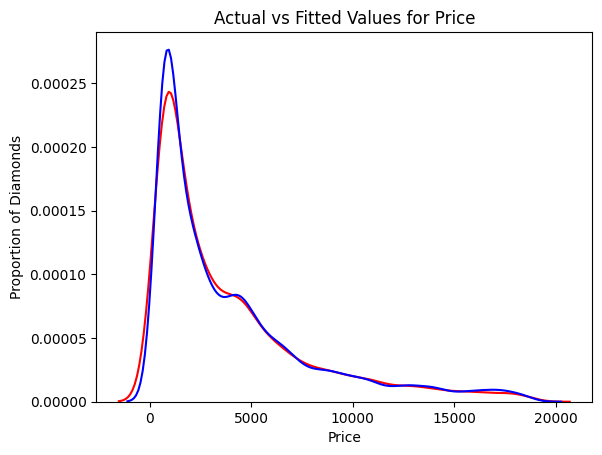

In [42]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(model_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [64]:
print(len(y_test))
print(len(model_pred))

10000
10000


In [65]:
print('Decision Tree Regressor RMSE:',np.sqrt(mean_squared_error(y_test,model_pred)))
print('Decision Tree Regressor Accuracy:',model.score(x_test,y_test))
print('Decision Tree Regressor MAE:',mean_absolute_error(y_test,model_pred))

Decision Tree Regressor RMSE: 738.1361823539069
Decision Tree Regressor Accuracy: 0.9647504491270742
Decision Tree Regressor MAE: 355.2148


## ***Random Forest Regressor***


<ipython-input-66-df59914434b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-66-df59914434b3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)


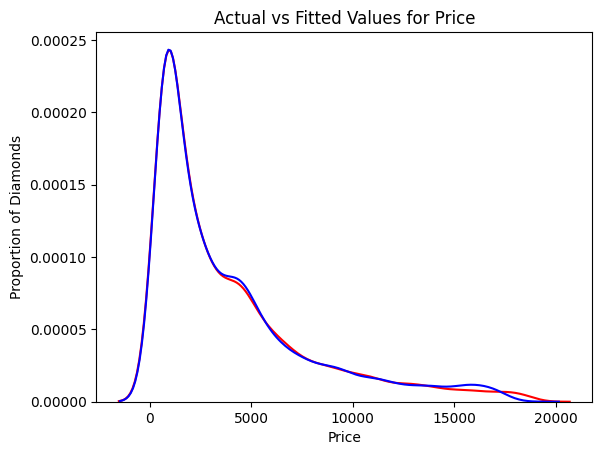

In [66]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [67]:
print(len(rf_pred))
print(len(y_test))

10000
10000


In [68]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 528.3147324367123
Random Forest Regressor Accuracy: 0.9819421499596445
Random Forest Regressor MAE: 264.02891385119045


## ***Linear Regressor***


<ipython-input-69-690c4affc127>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
<ipython-input-69-690c4affc127>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_pred,hist=False,color='b',label='Fitted Values',ax=ax)


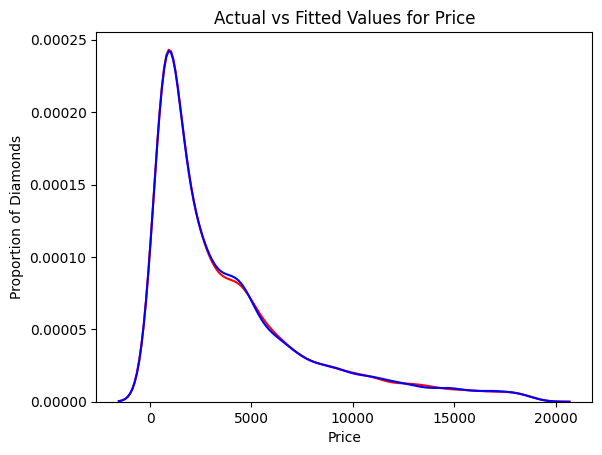

In [69]:
#distribution plot for actual and predicted values
ax = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(lr_pred,hist=False,color='b',label='Fitted Values',ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [70]:
print(len(lr_pred))
print(len(y_test))

10000
10000


In [71]:
print('Linear Regression Regressor RMSE:',np.sqrt(mean_squared_error(y_test,lr_pred)))
print('Linear Regression Regressor Accuracy:',lr.score(x_test,y_test))
print('Linear Regression Regressor MAE:',mean_absolute_error(y_test,lr_pred))

Linear Regression Regressor RMSE: 738.1361823539069
Linear Regression Regressor Accuracy: 0.9089238269387292
Linear Regression Regressor MAE: 355.2148


## **Predicting Function**

In [82]:
def predict_price(carat,cut,color,clarity,depth,table,x,y,z):
    # x = np.array([[carat,cut,color,clarity,depth,table,x,y,z]])
    x = [[carat, cut, color, clarity, depth, table, x, y, z]]
    predicted_price = model.predict(x)
    return predicted_price[0]

In [83]:
# predicted_price = predict_price(0.75, 2, 0, 3, 62.2, 55.0, 5.83, 5.87, 3.64)
predicted_price = predict_price(0.23,2,6,5,56.9,65.0,4.05,4.07,2.31)
print("Predicted price:", predicted_price)

Predicted price: 327.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
